# Analyzing video games sales

The file `video_games_sales.csv` contains information about the sales of many video games. The release year, genre, ratings and number of sales for different territories are present in this file.

## Getting started with the dataset

In [1]:
# Use the pandas library to read the file `video_games_sales.csv`
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = "video_games_sales.csv"
data_video_games = pd.read_csv(filename)
data_video_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# How many columns does it contains?
print("{} contains {} columns.".format(filename, data_video_games.columns.size))

video_games_sales.csv contains 16 columns.


In [3]:
# How many **unique** video games are reported in this dataset?
n_unique_game = data_video_games.Name.unique().size
print("There are {} unique videos games in {}.".format(n_unique_game, filename))

There are 11563 unique videos games in video_games_sales.csv.


In [4]:
# What is the oldest release year? The most recent?
oldest_year = data_video_games.Year_of_Release.min()
most_recent_year = data_video_games.Year_of_Release.max()
print("Oldest release year: {:.0f}".format(oldest_year))
print("Most recent release year: {:.0f}".format(most_recent_year))

Oldest release year: 1980
Most recent release year: 2020


In [5]:
# How many different publishers are present? List them
unique_publishers = data_video_games.Publisher.unique()

# some games have NaN as Publisher. Remove it from the unique list
unique_publishers = [x for x in unique_publishers if type(x) == str]

print("There are {} unique publishers:".format(len(unique_publishers)))
print(' / '.join(sorted(unique_publishers)))

There are 581 unique publishers:
10TACLE Studios / 1C Company / 20th Century Fox Video Games / 2D Boy / 3DO / 49Games / 505 Games / 5pb / 7G//AMES / 989 Sports / 989 Studios / AQ Interactive / ASC Games / ASCII Entertainment / ASCII Media Works / ASK / Abylight / Acclaim Entertainment / Accolade / Ackkstudios / Acquire / Activision / Activision Blizzard / Activision Value / Adeline Software / Aerosoft / Agatsuma Entertainment / Agetec / Aksys Games / Alawar Entertainment / Alchemist / Alternative Software / Altron / Alvion / American Softworks / Angel Studios / Answer Software / Aqua Plus / Aques / Arc System Works / Arena Entertainment / Aria / Arika / ArtDink / Aruze Corp / Ascaron Entertainment / Ascaron Entertainment GmbH / Asgard / Asmik Ace Entertainment / Asmik Corp / Aspyr / Astragon / Asylum Entertainment / Atari / Athena / Atlus / Avalon Interactive / Avanquest / Avanquest Software / Axela / BAM! Entertainment / BMG Interactive Entertainment / BPS / Banpresto / Benesse / Berk

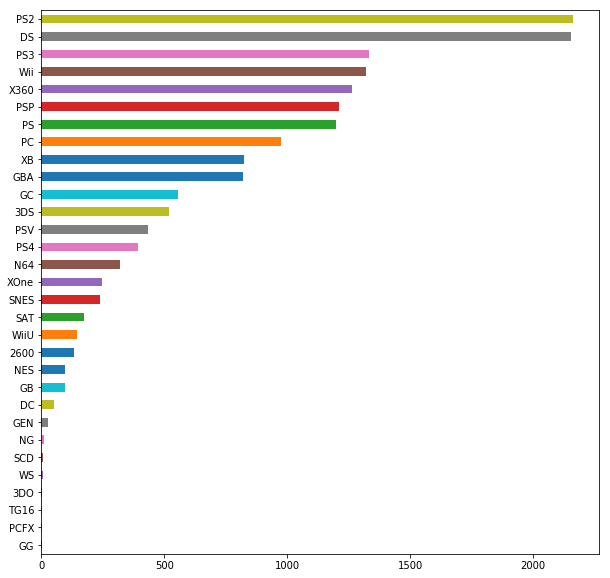

In [6]:
# Count the number of games released for each platform.
n_games_per_platform = data_video_games["Platform"].value_counts()

# Sort them in increasing order, and print them in a 
# horizontal bar graph.
n_games_per_platform_sorted = n_games_per_platform.sort_values()
n_games_per_platform_sorted.plot(kind="barh", figsize=(10, 10))

## Analyzing the sales

The most selling year was 2008.


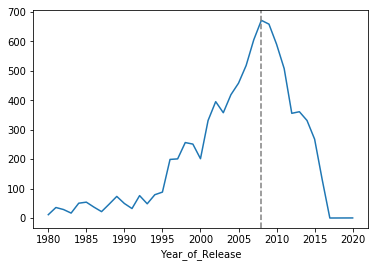

In [7]:
# Print with a plot line the global sales for each year.
# What was the most selling year?
sales_per_year = data_video_games.groupby("Year_of_Release").sum().Global_Sales
sales_per_year.plot()
most_selling_year = sales_per_year.idxmax()
plt.axvline(most_selling_year, color="gray", linestyle="--")
print("The most selling year was {:.0f}.".format(most_selling_year))

In [8]:
# What are the top 10 most selling games? (all platforms
# combined)

# We need to group by names, so that for example, the sales
# of GTA V X360 and GTA V PS3 are counted together (ie platforms
# are combined)
sales_per_game = data_video_games.groupby("Name").sum().Global_Sales
most_selling_games = sales_per_game.sort_values(ascending=False)
most_selling_games.head(10) # top 10

Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           30.82
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Name: Global_Sales, dtype: float64

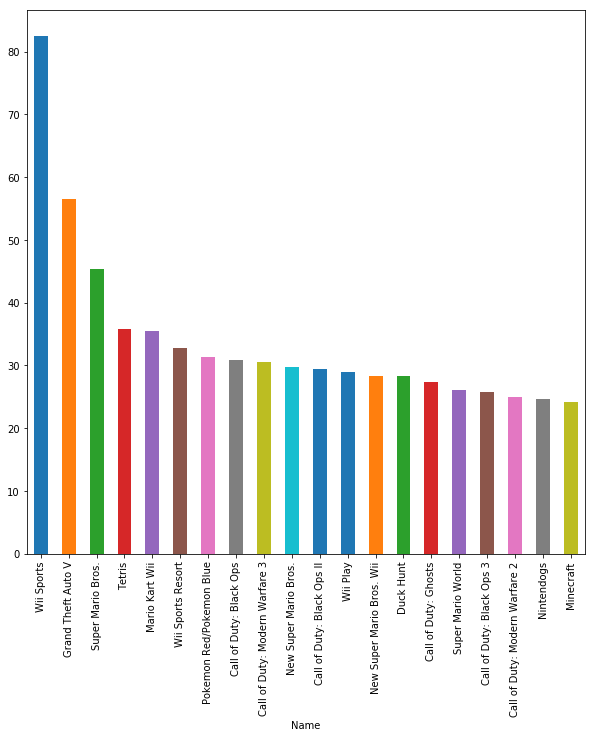

In [9]:
# Use a vertical bar chart to visualize the sales of the
# top 20 most selling games. You might need to rotate the
# labels on the x axis.
most_selling_games.head(20).plot(kind="bar", figsize=(10, 10))

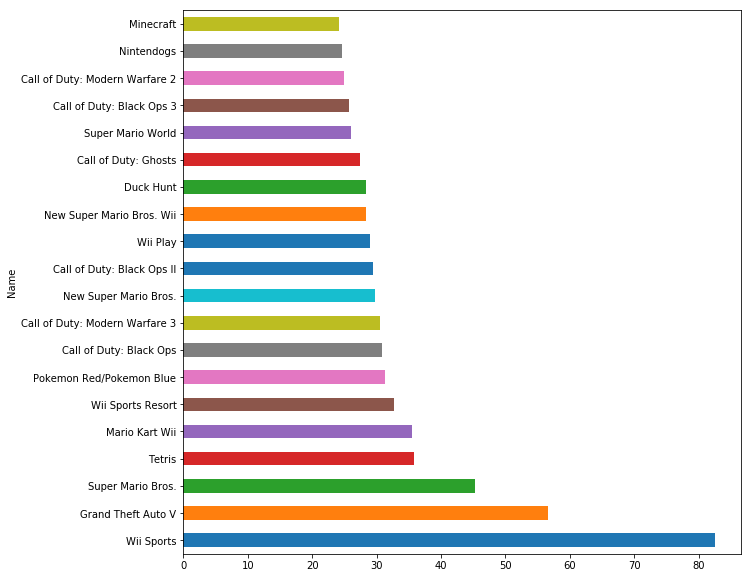

In [10]:
# I didn't realise it when making the assignment, but a
# horizontal bar chart is better for visualization
most_selling_games.head(20).plot(kind="barh", figsize=(10, 10))

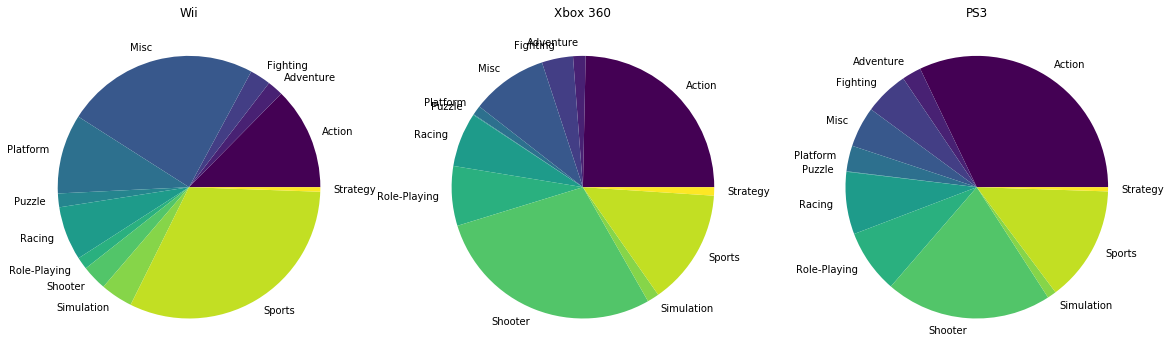

In [11]:
# Use a **pie** chart to visualize the sales of the different
# genres on the Wii platform. Do the same thing for the X360
# and the PS3.
ratio_genre_platform = data_video_games.groupby(["Platform", "Genre"]).sum().Global_Sales
ratio_genre_wii  = ratio_genre_platform.loc["Wii"]
ratio_genre_x360 = ratio_genre_platform.loc["X360"]
ratio_genre_ps3  = ratio_genre_platform.loc["PS3"]

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ratio_genre_wii.plot(kind="pie", ax=ax[0], colormap="viridis", label="", title="Wii")
ratio_genre_x360.plot(kind="pie", ax=ax[1], colormap="viridis", label="", title="Xbox 360")
ratio_genre_ps3.plot(kind="pie", ax=ax[2], colormap="viridis", label="", title="PS3")

In [12]:
# What are the top 10 best selling Xbox exclusives? A game
# can be considered as a Xbox exclusive if the "Publisher"
# is "Microsoft Game Studios".
xbox_exclusives = data_video_games[data_video_games.Publisher == "Microsoft Game Studios"]
xbox_exclusives_sorted = xbox_exclusives.sort_values(by="Global_Sales", ascending=False)
xbox_exclusives_sorted.head(10)[["Name", "Global_Sales"]]

,Name,Global_Sales
14,Kinect Adventures!,21.81
44,Halo 3,12.12
64,Halo: Reach,9.86
66,Halo 4,9.71
72,Minecraft,9.18
78,Halo 2,8.49
117,Gears of War 2,6.75
129,Halo: Combat Evolved,6.43
134,Halo 3: ODST,6.34
140,Gears of War 3,6.21


In [13]:
# What are the top 10 best selling Sony exclusives?
sony_exclusives = data_video_games[data_video_games.Publisher == "Sony Computer Entertainment"]
sony_exclusives_sorted = sony_exclusives.sort_values(by="Global_Sales", ascending=False)
sony_exclusives_sorted.head(10)[["Name", "Global_Sales"]]

,Name,Global_Sales
28,Gran Turismo 3: A-Spec,14.98
48,Gran Turismo 4,11.66
52,Gran Turismo,10.95
54,Gran Turismo 5,10.70
65,Final Fantasy VII,9.72
67,Gran Turismo 2,9.49
84,Final Fantasy X,8.05
95,Crash Bandicoot 2: Cortex Strikes Back,7.58
106,Tekken 3,7.16
109,Crash Bandicoot 3: Warped,7.13


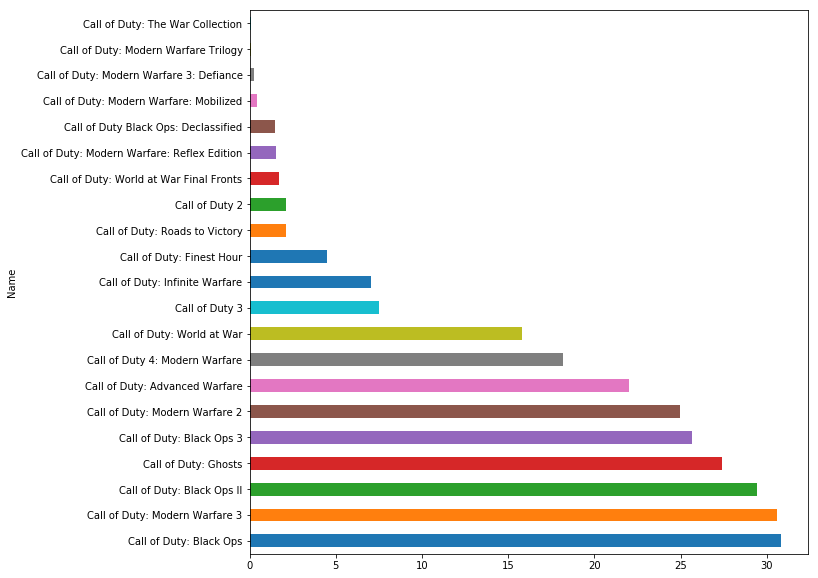

In [14]:
# The video game Call of duty has many opuses. Find the number
# of sales for each opus, then sort them in decreasing order
# and print them with a horizontal bar chart.
data_video_games.Name.fillna("", inplace=True)
call_of = data_video_games[data_video_games.Name.str.contains("Call of Duty")]
sales_per_call_of = call_of.groupby("Name").sum().Global_Sales
sales_per_call_of_sorted = sales_per_call_of.sort_values(ascending=False)
sales_per_call_of_sorted.plot(kind="barh", figsize=(10, 10))

## Overrated, underrated

A game can be considered *overrated* if the critic score is well above the user score. A game can be considered *underrated* if the critic score is well below the user score.

In [15]:
# Add a new column that computes the difference between
# the critic score and the user score.

# First let's take a look of the values for Critic/User scores
print(data_video_games[["Critic_Score", "User_Score"]].head(10))

   Critic_Score User_Score
0          76.0          8
1           NaN        NaN
2          82.0        8.3
3          80.0          8
4           NaN        NaN
5           NaN        NaN
6          89.0        8.5
7          58.0        6.6
8          87.0        8.4
9           NaN        NaN


In [16]:
# It seems that Critic_Score is WAY larger than User_score.
# Indeed, Critic_Score is within 0-100 while User_score is within 0-10.
# A lot of rows also have NaN. It won't be possible to compute a
# meaningful difference for those rows, so start by dropping them.
video_games_with_ratings = data_video_games.dropna(subset=["Critic_Score", "User_Score"])

# There are also games with a User_Score set to "tbd". Drop them.
video_games_with_ratings = video_games_with_ratings[video_games_with_ratings.User_Score != "tbd"]

# Convert as float because the "tbd" value has set all values to be
# considered as an "object", and we can't do arithmetic with "object"
video_games_with_ratings.User_Score = video_games_with_ratings.User_Score.astype(float, copy=False)

# Then compute the difference
video_games_with_ratings["Scores_Difference"] = video_games_with_ratings["Critic_Score"] \
                                              - 10*video_games_with_ratings["User_Score"]
print("The first values for the new \"Scores_Difference\" column:")
print(video_games_with_ratings.Scores_Difference.head())

The first values for the new "Scores_Difference" column:
0   -4.0
2   -1.0
3    0.0
6    4.0
7   -8.0
Name: Scores_Difference, dtype: float64


In [17]:
# What are the top 10 overrated games?

# In my case, the difference is Critic_Score - User_Score,
# so the overrated games are the ones with the larger (positive)
# differences.
scores_differences_sorted = video_games_with_ratings.sort_values(by="Scores_Difference", ascending=False)
top_10_overrated = scores_differences_sorted.head(10)
top_10_overrated[["Name", "Platform", "Critic_Score", "User_Score"]]

,Name,Platform,Critic_Score,User_Score
10483,Thrillville: Off the Rails,PSP,72.0,0.6
5379,Company of Heroes 2,PC,80.0,2.1
37,Call of Duty: Modern Warfare 3,PS3,88.0,3.2
29,Call of Duty: Modern Warfare 3,X360,88.0,3.4
4621,Thrillville: Off the Rails,PS2,70.0,1.7
1040,Call of Duty: Modern Warfare 3,PC,78.0,2.5
2500,Call of Duty: Modern Warfare 3,Wii,70.0,1.8
16204,Football Manager Live,PC,82.0,3.1
192,Diablo III,PC,88.0,4.0
5753,Skylanders: SuperChargers,PS4,81.0,3.3


In [18]:
# What are the top 10 underrated games?

# In my case, the difference is Critic_Score - User_Score,
# so the underrated games are the ones with the larger (negative)
# differences, ie the smaller difference. The games are already
# sorted by this difference in decreasing order, so take the
# last items to get the ones with the smaller difference. But reverse
# it because otherwise the last item (ie the most underrated) would
# be at the bottom of the table.
top_10_underrated = scores_differences_sorted.tail(10)
top_10_underrated[["Name", "Platform", "Critic_Score", "User_Score"]][::-1]

,Name,Platform,Critic_Score,User_Score
5825,Shrek Swamp Kart Speedway,GBA,27.0,8.9
15991,Antz Extreme Racing,XB,35.0,8.7
9480,Shrek Super Party,XB,33.0,8.0
14615,Street Jam Basketball,GBA,35.0,8.0
14692,Buffy the Vampire Slayer: Wrath of the Darkhul...,GBA,44.0,8.6
7486,BeyBlade VForce: Super Tournament Battle,GC,33.0,7.5
9892,Airborne Troops: Countdown to D-Day,PS2,39.0,8.1
10721,Star Trek: Shattered Universe,PS2,42.0,8.3
13576,Backyard Baseball '09,Wii,37.0,7.8
7699,Predator: Concrete Jungle,PS2,47.0,8.8
